<a href="https://colab.research.google.com/github/uvezero/cat_vs_dog/blob/main/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOS

In [ ]:
#os.listdir(test_dir)
os.listdir('cats_and_dogs')

['test', '.DS_Store', 'validation', 'train']

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory('cats_and_dogs/train',
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory('cats_and_dogs/validation',
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           batch_size=batch_size,
                                                           class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(directory='cats_and_dogs',batch_size=1,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           classes=['test'], shuffle=False)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


In [ ]:
len(next(train_data_gen))

2

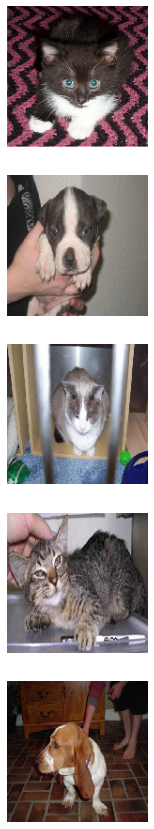

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
train_image_generator = ImageDataGenerator(rescale=1./255,
rotation_range=30,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')


Found 2000 images belonging to 2 classes.


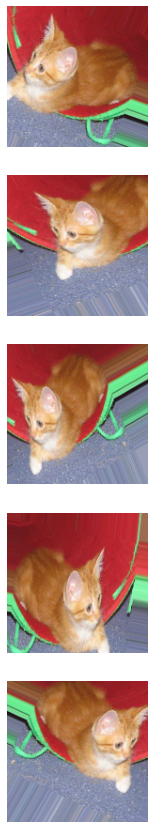

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [55]:
# 7
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3),padding="same"))
model.add(MaxPooling2D((2,2),padding="valid"))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',padding="same"))
model.add(MaxPooling2D((2,2),padding="valid"))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPooling2D((2,2),padding="valid"))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding="same"))
model.add(MaxPooling2D((2,2),padding="valid"))



model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 18, 18, 128)     

In [56]:
# 8
#x, steps_per_epoch, epochs, validation_data, and validation_steps.
history = model.fit(train_data_gen,
                    steps_per_epoch=train_data_gen.n//train_data_gen.batch_size,
                    epochs=epochs, validation_data=val_data_gen,
                    validation_steps=val_data_gen.n//val_data_gen.batch_size)

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


15/15 [==============================] - 125s 8s/step - loss: 0.7109 - accuracy: 0.5128 - val_loss: 0.6917 - val_accuracy: 0.5580
Epoch 2/15
15/15 [==============================] - 119s 8s/step - loss: 0.6884 - accuracy: 0.5125 - val_loss: 0.6864 - val_accuracy: 0.5592
Epoch 3/15
15/15 [==============================] - 117s 8s/step - loss: 0.6823 - accuracy: 0.5540 - val_loss: 0.6840 - val_accuracy: 0.5402
Epoch 4/15
15/15 [==============================] - 119s 8s/step - loss: 0.6655 - accuracy: 0.5705 - val_loss: 0.6408 - val_accuracy: 0.6350
Epoch 5/15
15/15 [==============================] - 125s 8s/step - loss: 0.6461 - accuracy: 0.5932 - val_loss: 0.6231 - val_accuracy: 0.6429
Epoch 6/15
15/15 [==============================] - 118s 8s/step - loss: 0.6180 - accuracy: 0.6448 - val_loss: 0.5675 - val_accuracy: 0.7065
Epoch 7/15
15/15 [==============================] - 121s 8s/step - loss: 0.5925 - accuracy: 0.6875 - val_loss: 0.5785 - val_accuracy: 0.6942
Epoch 8/15
15/15 [======

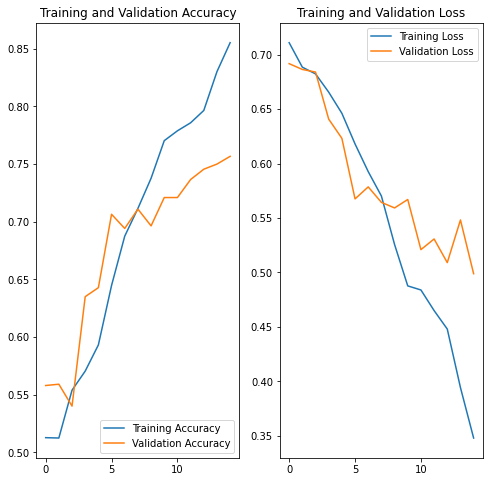

In [57]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [58]:
#conversion to make test_data_gen plottable with plotImages
test_plot = []
for i in range(len(test_data_gen)):
  test_plot.append(test_data_gen[i][0][0])

test_plot = np.array(test_plot)

In [59]:
#10
probabilities=model.predict(test_data_gen)[:,0]



50/50 [==============================] - 2s 27ms/step


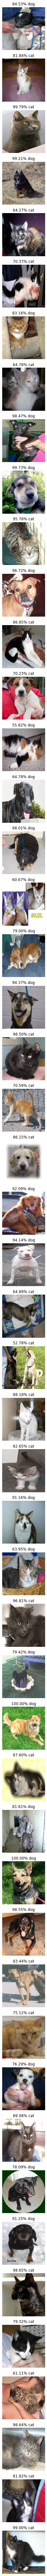

In [60]:
plotImages(test_plot,probabilities)

In [61]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 80.0% of the images of cats and dogs.
You passed the challenge!
